__This file discusses some observations from the data. Most of them are self-explainable through graphs.__

`session_durantion` has some NANs, so they are interpolated. 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Data.csv', delimiter=';')
nan_df = df[df['hits'] == '\\N']
df = df[df['hits'] != '\\N']
df['session_durantion'] = df['session_durantion'].replace(to_replace='\\N',value =np.nan)
df['session_durantion'].interpolate(method = 'spline', order = 3 ,inplace= True)
df.tail()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
988671,10,L4,Wednesday,23,10,8001,79178,1,173,3
988672,9,L1,Sunday,10,10,2113,74017;0,2,813,69
988674,7,L3,Tuesday,13,7,2113,44337;0,2,621,37
988675,6,L6,Friday,5,8,2113,38715;0,4,0,2
988680,1,L4,Thursday,15,1,2116,76673;0,2,4544,18


It is difficult to use `path_id_set` as it is. Therefore it is transformed to `path_length` and `path_imp`.
The `path_length` stores the number of IDs each path has.

In [2]:
df['path_id_set'] = df['path_id_set'].str.split(';')
df['path_id_set'].loc[df['path_id_set'].isnull()] = df['path_id_set'].loc[df['path_id_set'].isnull()].apply(lambda x: [])
df['path_length'] = df['path_id_set'].apply(len)
df.tail()

/Users/raghuramkalyanam/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,path_length
988671,10,L4,Wednesday,23,10,8001,[79178],1,173,3,1
988672,9,L1,Sunday,10,10,2113,"[74017, 0]",2,813,69,2
988674,7,L3,Tuesday,13,7,2113,"[44337, 0]",2,621,37,2
988675,6,L6,Friday,5,8,2113,"[38715, 0]",4,0,2,2
988680,1,L4,Thursday,15,1,2116,"[76673, 0]",2,4544,18,2


`path_imp` stores the sum of weighted frequencies of each set of `path_id_set`.

In [3]:
import itertools
path_ids=[]
df['path_id_set'].apply(lambda x : path_ids.append(x))
path_ids_list =  list(itertools.chain(*path_ids))

import collections
counter = collections.Counter(path_ids_list)

def imp(counter):
    imp_dict = {}
    for key,value in dict(counter).items():
        imp_dict[key] = value/sum(counter.values())
    return imp_dict
imp_dict = imp(counter)     

df['path_imp'] = df['path_id_set'].apply(lambda x : sum([imp_dict[i] for i in x]))
df.tail()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,path_length,path_imp
988671,10,L4,Wednesday,23,10,8001,[79178],1,173,3,1,0.000304
988672,9,L1,Sunday,10,10,2113,"[74017, 0]",2,813,69,2,0.438654
988674,7,L3,Tuesday,13,7,2113,"[44337, 0]",2,621,37,2,0.440783
988675,6,L6,Friday,5,8,2113,"[38715, 0]",4,0,2,2,0.448925
988680,1,L4,Thursday,15,1,2116,"[76673, 0]",2,4544,18,2,0.438613


Similarly `entry_page_imp` is added. As `entry_page` can't be used directly.

In [4]:
entry_page_counter = collections.Counter(df['entry_page'].tolist())
entry_page_dict = imp(entry_page_counter)
df['entry_page_imp'] = df['entry_page'].apply(lambda x : entry_page_dict[x])
df.tail()

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,path_length,path_imp,entry_page_imp
988671,10,L4,Wednesday,23,10,8001,[79178],1,173,3,1,0.000304,0.017549
988672,9,L1,Sunday,10,10,2113,"[74017, 0]",2,813,69,2,0.438654,0.332617
988674,7,L3,Tuesday,13,7,2113,"[44337, 0]",2,621,37,2,0.440783,0.332617
988675,6,L6,Friday,5,8,2113,"[38715, 0]",4,0,2,2,0.448925,0.332617
988680,1,L4,Thursday,15,1,2116,"[76673, 0]",2,4544,18,2,0.438613,0.202408


In [6]:
df.columns

Index(['row_num', 'locale', 'day_of_week', 'hour_of_day', 'agent_id',
       'entry_page', 'path_id_set', 'traffic_type', 'session_durantion',
       'hits', 'path_length', 'path_imp', 'entry_page_imp'],
      dtype='object')

In [7]:
df['session_durantion'] = pd.to_numeric(df['session_durantion'])
df['hits'] = pd.to_numeric(df['hits'])


__It looks like 19:00 has highest hits as well as highest frequency.__

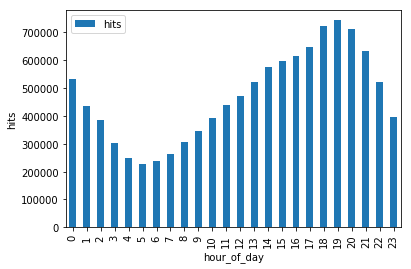

In [8]:
%matplotlib inline

#import pylab as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np = pd.np
df.groupby('hour_of_day').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
plt.ylabel('hits')
plt.show()

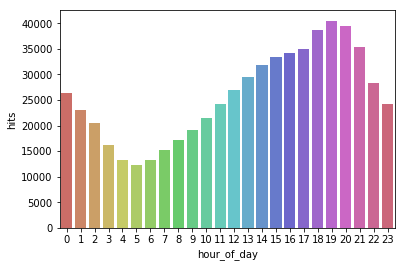

In [9]:
sns.countplot(x='hour_of_day',data=df, palette='hls')
plt.ylabel('Frequency')
plt.show()

__It looks like Tuesday has lowest frequency but highest hits.__

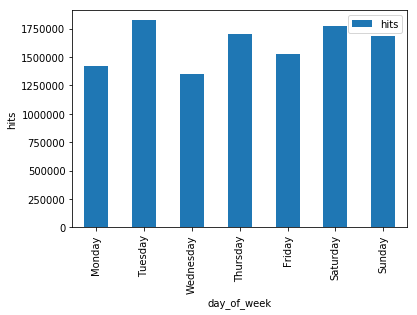

In [10]:
ax = df.groupby('day_of_week').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])
plt.ylabel('hits')
plt.show()

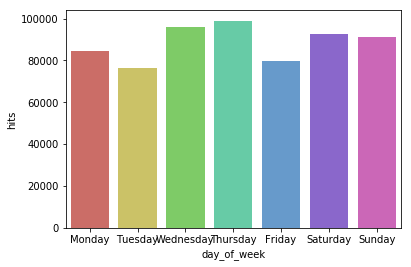

In [11]:
ax = sns.countplot(x='day_of_week',data=df, palette='hls')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])
plt.ylabel('Frequency')
plt.show()

__L3 has highest frequency as well as highest no of hits. Of the rest L1 has second highest frequency but lowest hits.__

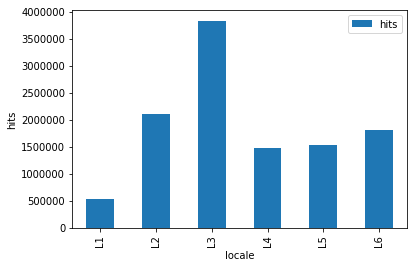

In [12]:
df.groupby('locale').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
plt.ylabel('hits')
plt.show()

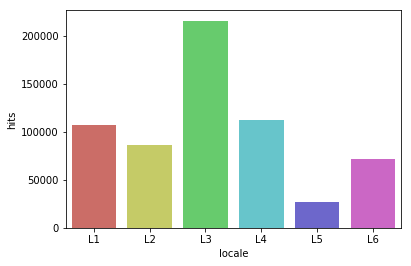

In [13]:
ax = sns.countplot(x='locale',data=df, palette='hls')
ax.set_xticklabels(['L1', 'L2', 'L3', 'L4', 'L5','L6'])
plt.ylabel('Frequency')
plt.show()

__Agent 10 has highest hits as well as highest frequency in the data. Seems other agents frequency is proportional to the hits received.__

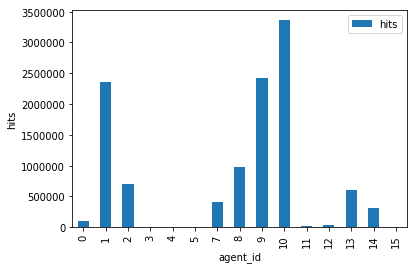

In [14]:
df.groupby('agent_id').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
plt.ylabel('hits')
plt.show()

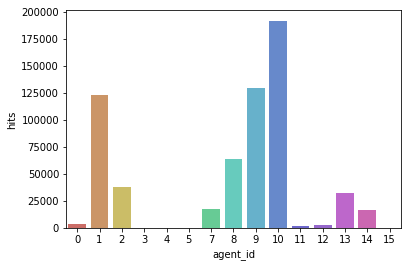

In [15]:
sns.countplot(x='agent_id',data=df, palette='hls')
plt.ylabel('Frequency')
plt.show()

__Traffic_type 2 has highest frequency, though Traffic_type 1 has highest hits.__

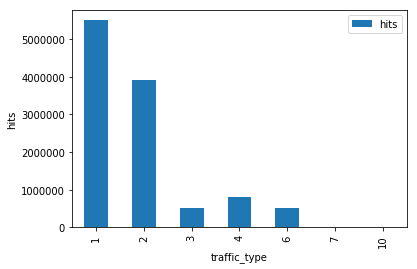

In [16]:
df.groupby('traffic_type').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
plt.ylabel('hits')
plt.show()

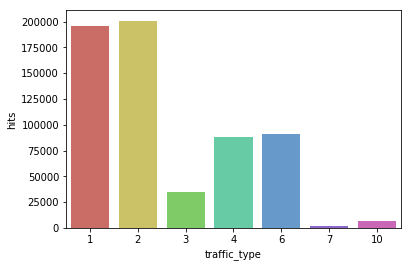

In [17]:
sns.countplot(x='traffic_type',data=df, palette='hls')
plt.ylabel('Frequency')
plt.show()

__Looks like the Path_length of 2 has higher frequency as well as hiher hits.__

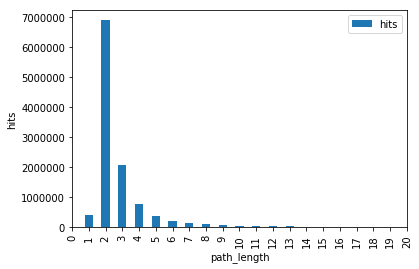

In [18]:
df.groupby('path_length').agg({'hits':'sum'}).plot.bar(figsize=(6,4))
plt.xlim((0,20))
plt.ylabel('hits')
plt.show()

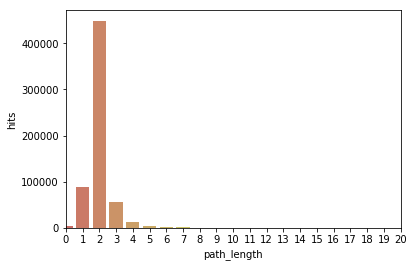

In [19]:
sns.countplot(x='path_length',data=df, palette='hls')
plt.ylabel('Frequency')
plt.xlim((0,20))
plt.show()

__The distribution of hits ranges from 0 to 4000+, which means a lot of variance. The hit size of 3 is more frequent.__

/Users/raghuramkalyanam/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/raghuramkalyanam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


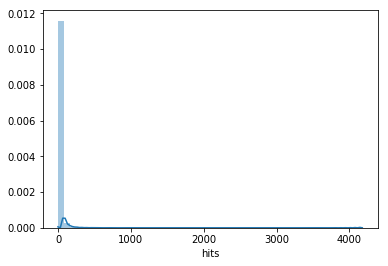

In [20]:
sns.distplot(df['hits'])
plt.show()

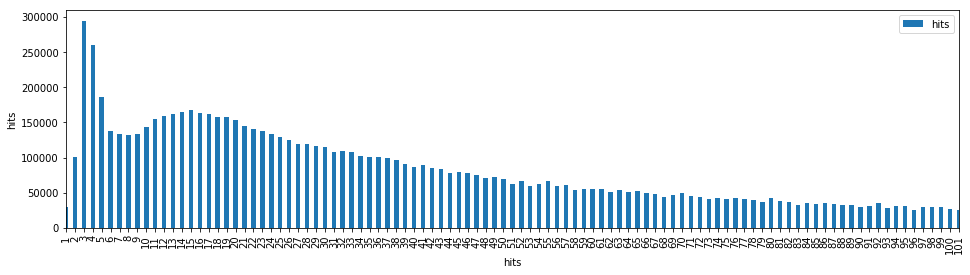

In [21]:
df.groupby('hits').agg({'hits':'sum'}).plot.bar(figsize=(16,4))
plt.xlim((0,100))
plt.ylabel('hits')
plt.show()

__It seems the `session_durantion` has highest frequency at near zero, and also highest hits.__

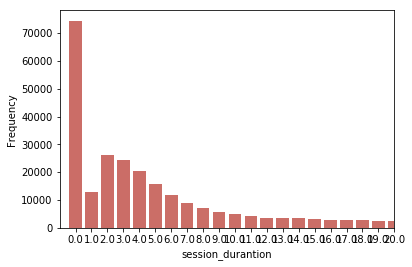

In [27]:
sns.countplot(x='session_durantion',data=df, palette='hls')
plt.ylabel('Frequency')
plt.xlim((-1,20))
plt.show()

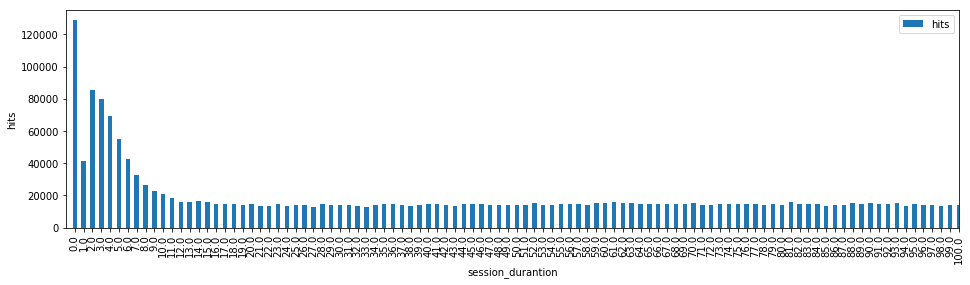

In [26]:
df.groupby('session_durantion').agg({'hits':'sum'}).plot.bar(figsize=(16,4))
plt.xlim((-1,100))
plt.ylabel('hits')
plt.show()

__The correlation of each feature with the dependent variable. Looks like `path_length` is a good feature. Though `traffic_type` shows considerable correlation, it is categorical.__

In [23]:
df.corr().iloc[:,-4:-3]

,hits
row_num,0.001905
hour_of_day,-0.007967
agent_id,-0.012523
entry_page,-0.032017
traffic_type,-0.201205
session_durantion,0.245530
hits,1.000000
path_length,0.402318
path_imp,0.099270
entry_page_imp,-0.049214


__Getting dummies for all the categorical variables.__

In [5]:
df.drop(columns = ['entry_page','path_id_set'],inplace = True )

df = pd.get_dummies(df, prefix = ['locale','day_of_week','agent_id','traffic_type'], columns = ['locale','day_of_week','agent_id','traffic_type'] )


In [24]:
#import numpy as np
#df['log_session_durantion'] =df['session_durantion'].apply(np.log)
#df['log_session_durantion'] = df['log_session_durantion'].replace(-np.inf,0)

df = df [['row_num', 'hour_of_day','session_durantion','path_length',
           'path_imp', 'entry_page_imp', 'locale_L1', 'locale_L2', 'locale_L3',
           'locale_L4', 'locale_L5', 'locale_L6','day_of_week_Monday',
            'day_of_week_Tuesday','day_of_week_Wednesday','day_of_week_Thursday',
            'day_of_week_Friday','day_of_week_Saturday', 'day_of_week_Sunday',
           'agent_id_0', 'agent_id_1', 'agent_id_2', 'agent_id_3', 'agent_id_4',
           'agent_id_5', 'agent_id_7', 'agent_id_8', 'agent_id_9', 'agent_id_10',
           'agent_id_11', 'agent_id_12', 'agent_id_13', 'agent_id_14',
           'agent_id_15', 'traffic_type_1', 'traffic_type_2', 'traffic_type_3',
           'traffic_type_4', 'traffic_type_6', 'traffic_type_7',
           'traffic_type_10','hits']]

__More information is provided in the python files. The final result achieved is around MSE of 31.7 hits on the validation data.__